# Import the Data and Libraries


In [1]:
!git clone https://github.com/Preellis/151A-Nursing-Homes

fatal: destination path '151A-Nursing-Homes' already exists and is not an empty directory.


In [2]:
!unzip /content/151A-Nursing-Homes/COVID_19_Nursing_Home_Data_01_28_2024.zip

Archive:  /content/151A-Nursing-Homes/COVID_19_Nursing_Home_Data_01_28_2024.zip
replace COVID_19_Nursing_Home_Data_01_28_2024.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
homes_raw = pd.read_csv("/content/COVID_19_Nursing_Home_Data_01_28_2024.csv")

<ipython-input-4-575517ea0752>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  homes_raw = pd.read_csv("/content/COVID_19_Nursing_Home_Data_01_28_2024.csv")


# Initial Data Exploration and Data Clearning

In [36]:
desc = homes_raw.describe().round(2)
pd.set_option('display.max_rows', None)
desc

,provider_zip_code,provider_phone_number,residents_weekly_confirmed_covid_19,residents_total_confirmed_covid_19,residents_weekly_all_deaths,residents_total_all_deaths,residents_weekly_covid_19_deaths,residents_total_covid_19_deaths,number_of_all_beds,total_number_of_occupied_beds,...,number_of_all_healthcare_personnel_eligible_to_work_in_this_facility_for_at_least_1_day_this_week,number_of_all_healthcare_personnel_eligible_to_work_in_this_facility_for_at_least_1_day_this_week_who_received_a_completed_covid_19_vaccination_at_any_time,recent_percentage_of_current_healthcare_personnel_who_received_a_completed_covid_19_vaccination_at_any_time,percentage_of_current_healthcare_personnel_who_received_a_completed_covid_19_vaccination_at_any_time,Number_of_Residents_Staying_in_this_Facility_for_At_Least_1_Day_This_Week_Up_to_Date_with_COVID_19_Vaccines,Recent_Percentage_of_Current_Residents_Up_to_Date_with_COVID_19_Vaccines,Percentage_of_Current_Residents_Up_to_Date_with_COVID_19_Vaccines,Number_of_Healthcare_Personnel_Eligible_to_Work_in_this_Facility_for_At_Least_1_Day_This_Week_Up_to_Date_with_COVID_19_Vaccines,Recent_Percentage_of_Current_Healthcare_Personnel_Up_to_Date_with_COVID_19_Vaccines,Percentage_of_Current_Healthcare_Personnel_Up_to_Date_with_COVID_19_Vaccines
count,2923332.00,2.923332e+06,2890637.00,2890637.00,2890637.00,2890637.00,2890637.00,2890637.00,2875523.00,2878893.00,...,2055637.00,2002285.00,0.0,2002285.00,1276868.00,14316.00,2055652.00,1277271.00,14318.00,2055637.00
mean,50332.18,5.879536e+09,0.68,68.13,0.43,47.63,0.06,9.00,106.28,77.81,...,132.74,110.53,NaN,81.03,40.36,39.57,30.68,33.22,13.85,15.32
std,26842.64,2.331306e+09,3.05,63.85,1.59,66.41,0.58,11.08,58.70,48.58,...,88.18,84.64,NaN,18.40,37.53,29.66,34.52,48.92,26.14,24.92
min,660.00,1.111000e+03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,29827.00,3.867922e+09,0.00,21.00,0.00,14.00,0.00,1.00,65.00,46.00,...,80.00,59.00,NaN,71.70,13.00,6.78,0.00,3.00,0.00,0.00
50%,48734.00,6.059873e+09,0.00,54.00,0.00,33.00,0.00,6.00,99.00,70.00,...,113.00,91.00,NaN,85.85,34.00,43.16,8.57,16.00,2.42,1.11
75%,72933.00,8.023715e+09,0.00,97.00,1.00,63.00,0.00,13.00,126.00,97.00,...,160.00,137.00,NaN,95.76,58.00,63.46,63.42,44.00,10.75,21.28
max,99929.00,9.898959e+09,312.00,1008.00,986.00,3018.00,89.00,143.00,1748.00,2689.00,...,2039.00,1962.00,NaN,100.00,931.00,100.00,100.00,1747.00,100.00,100.00


In [5]:
homes = homes_raw
print("----% OF NA VALUES IN EACH COLUMN----")
for column in homes.columns:
    # Calculate the number of NA values in the current column
    na_count = homes[column].isna().sum()

    # Print the number of NA values for the column
    percent = round(na_count/len(homes)*100,2)
    print(f"{column}: {percent}%")

    # Dropping columns filled less than 75%
    if percent >= 75:
      homes = homes.drop(columns = [column])


----% OF NA VALUES IN EACH COLUMN----
week_ending: 0.0%
federal_provider_number: 0.0%
provider_name: 0.0%
provider_address: 0.0%
provider_city: 0.0%
provider_state: 0.0%
provider_zip_code: 0.0%
provider_phone_number: 0.0%
county: 0.0%
submitted_data: 0.0%
passed_quality_assurance_check: 0.73%
residents_weekly_confirmed_covid_19: 1.12%
residents_total_confirmed_covid_19: 1.12%
residents_weekly_all_deaths: 1.12%
residents_total_all_deaths: 1.12%
residents_weekly_covid_19_deaths: 1.12%
residents_total_covid_19_deaths: 1.12%
number_of_all_beds: 1.64%
total_number_of_occupied_beds: 1.52%
Residents_Hospitalizations_with_Confirmed_COVID_19: 1.12%
Residents_Hospitalizations_with_Confirmed_COVID_19_and_Up_to_Date_with_Vaccines: 1.12%
staff_weekly_confirmed_covid_19: 1.12%
staff_total_confirmed_covid_19: 1.12%
weekly_resident_confirmed_covid_19_cases_per_1_000_residents: 1.88%
weekly_resident_covid_19_deaths_per_1_000_residents: 1.88%
total_resident_confirmed_covid_19_cases_per_1_000_residents: 

In [6]:
# Dropping irrelevant identifying data
homes = homes.drop(columns = ['federal_provider_number', 'provider_phone_number'])

In [7]:
print(f"Number of unique cities: {homes['provider_city'].nunique()}")
print(f"Number of unique zip codes: {homes['provider_zip_code'].nunique()}")
print(f"Number of unique states: {homes['provider_state'].nunique()}")
print(f"Number of unique addresses: {homes['provider_address'].nunique()}")
print(f"Number of unique providers: {homes['provider_name'].nunique()}")
print(f"Number of unique counties: {homes['county'].nunique()}")

# Dropping non numerical columns as too many data points to encode
homes = homes.drop(columns = ['provider_city','provider_zip_code','provider_state','provider_address','provider_name','county'])

Number of unique cities: 5271
Number of unique zip codes: 9255
Number of unique states: 53
Number of unique addresses: 15486
Number of unique providers: 15314
Number of unique counties: 1705


In [8]:
#dropping columns included in calculated percentages already
homes = homes.drop(columns=[
    'Number_of_Healthcare_Personnel_Eligible_to_Work_in_this_Facility_for_At_Least_1_Day_This_Week_Up_to_Date_with_COVID_19_Vaccines',
    'number_of_all_healthcare_personnel_eligible_to_work_in_this_facility_for_at_least_1_day_this_week_who_received_a_completed_covid_19_vaccination_at_any_time',
    'Number_of_Residents_Staying_in_this_Facility_for_At_Least_1_Day_This_Week_Up_to_Date_with_COVID_19_Vaccines',
  ])

In [9]:
#dropping columns already included in per 1000 calculated columns
homes = homes.drop(columns=[
    'residents_weekly_confirmed_covid_19',
    'residents_total_confirmed_covid_19',
    'residents_weekly_covid_19_deaths',
    'residents_total_covid_19_deaths',
  ])

In [10]:
#dropping total columns as we are more interested in weekly trends
homes = homes.drop(columns=[
    'total_resident_confirmed_covid_19_cases_per_1_000_residents',
    'total_resident_covid_19_deaths_per_1_000_residents',
    'staff_total_confirmed_covid_19',
    'residents_total_all_deaths',
])

In [11]:
# Filtering out invalid data as determined by data source (CMS)
homes_submitted = homes[homes['submitted_data'] == 'Y']
homes_submitted = homes[homes['passed_quality_assurance_check'] == 'Y']
homes_submitted = homes_submitted.drop(columns = ['passed_quality_assurance_check', 'submitted_data'])

In [12]:
# Drop the cases where there is a na data (~50%)
homes_submitted = homes_submitted.dropna();
# Convert the date into int of YYMMDD
homes_submitted['week_ending'] = pd.to_datetime(homes_submitted['week_ending'])
homes_submitted['week_ending'] = homes_submitted['week_ending'].dt.strftime('%y%m%d').astype(int)

In [13]:
homes_submitted.columns

Index(['week_ending', 'residents_weekly_all_deaths', 'number_of_all_beds',
       'total_number_of_occupied_beds',
       'Residents_Hospitalizations_with_Confirmed_COVID_19',
       'Residents_Hospitalizations_with_Confirmed_COVID_19_and_Up_to_Date_with_Vaccines',
       'staff_weekly_confirmed_covid_19',
       'weekly_resident_confirmed_covid_19_cases_per_1_000_residents',
       'weekly_resident_covid_19_deaths_per_1_000_residents',
       'number_of_residents_staying_in_this_facility_for_at_least_1_day_this_week',
       'number_of_all_healthcare_personnel_eligible_to_work_in_this_facility_for_at_least_1_day_this_week',
       'percentage_of_current_healthcare_personnel_who_received_a_completed_covid_19_vaccination_at_any_time',
       'Percentage_of_Current_Residents_Up_to_Date_with_COVID_19_Vaccines',
       'Percentage_of_Current_Healthcare_Personnel_Up_to_Date_with_COVID_19_Vaccines'],
      dtype='object')

In [14]:
homes_renamed = homes_submitted.rename(columns={
  'week_ending': 'date',
  'residents_weekly_all_deaths': 'wklyResDeaths',
  'number_of_all_beds': 'numBeds',
  'total_number_of_occupied_beds': 'numBedsUsed',
  'Residents_Hospitalizations_with_Confirmed_COVID_19': 'resHosipitalCases',
  'Residents_Hospitalizations_with_Confirmed_COVID_19_and_Up_to_Date_with_Vaccines': 'resVaxxedHosipitalCases',
  'staff_weekly_confirmed_covid_19': 'wklyStaffCases',
  'weekly_resident_confirmed_covid_19_cases_per_1_000_residents': 'wklyResCasesPer1000',
  'weekly_resident_covid_19_deaths_per_1_000_residents': 'wklyResCovidDeathsPer1000',
  'number_of_residents_staying_in_this_facility_for_at_least_1_day_this_week': 'wklyRes',
  'number_of_all_healthcare_personnel_eligible_to_work_in_this_facility_for_at_least_1_day_this_week': 'wklyStaff',
  'percentage_of_current_healthcare_personnel_who_received_a_completed_covid_19_vaccination_at_any_time': 'percentStaffVaxxedBefore',
  'Percentage_of_Current_Residents_Up_to_Date_with_COVID_19_Vaccines': 'percentResVaxUpToDate',
  'Percentage_of_Current_Healthcare_Personnel_Up_to_Date_with_COVID_19_Vaccines': 'percentStaffVaxUptoDate',
}).reset_index(drop=True)

# Data Exploration/Visualization

In [15]:
df = homes_renamed
covid_data = df.drop(columns = 'wklyResCasesPer1000')
covid_target = pd.DataFrame(df['wklyResCasesPer1000'])

<Axes: ylabel='Count'>

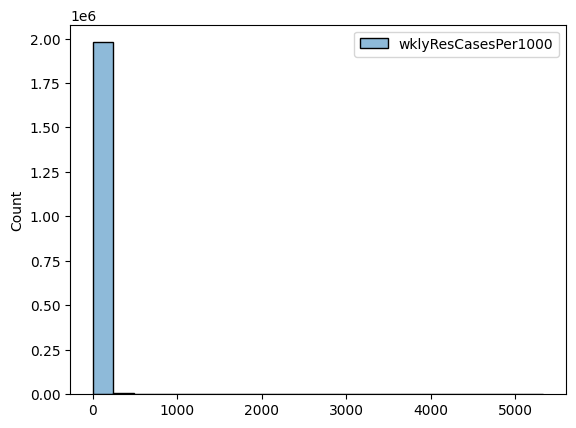

In [27]:
sns.histplot(covid_target, log_scale=False)

<Axes: ylabel='Count'>

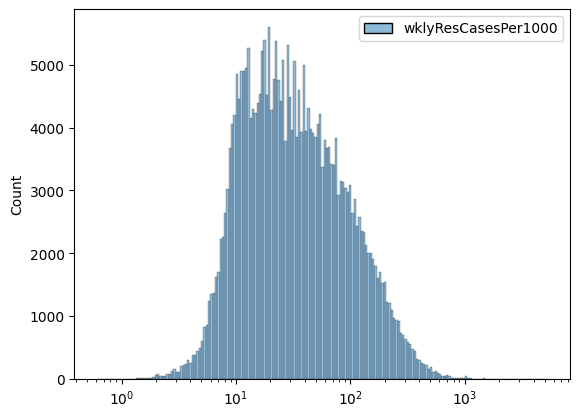

In [28]:
sns.histplot(covid_target, log_scale=True)

In [16]:
covid_data.describe().round(2)

,date,wklyResDeaths,numBeds,numBedsUsed,resHosipitalCases,resVaxxedHosipitalCases,wklyStaffCases,wklyResCovidDeathsPer1000,wklyRes,wklyStaff,percentStaffVaxxedBefore,percentResVaxUpToDate,percentStaffVaxUptoDate
count,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00,1987815.00
mean,222366.75,0.36,106.43,79.38,0.01,0.00,0.62,0.27,81.71,132.92,81.22,30.58,15.36
std,7583.65,0.80,58.62,49.19,0.19,0.06,1.83,2.95,49.95,87.96,18.03,34.61,24.84
min,210530.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,220123.00,0.00,65.00,48.00,0.00,0.00,0.00,0.00,49.00,80.00,71.83,0.00,0.00
50%,220918.00,0.00,99.00,72.00,0.00,0.00,0.00,0.00,73.00,113.00,85.92,7.38,1.08
75%,230507.00,1.00,127.00,99.00,0.00,0.00,0.00,0.00,102.00,160.00,95.78,63.56,21.58
max,231231.00,120.00,1748.00,2689.00,159.00,16.00,250.00,500.00,2543.00,2039.00,100.00,100.00,100.00


In [17]:
covid_target.describe().round(2)

,wklyResCasesPer1000
count,1987815.00
mean,8.24
std,35.15
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,5333.33


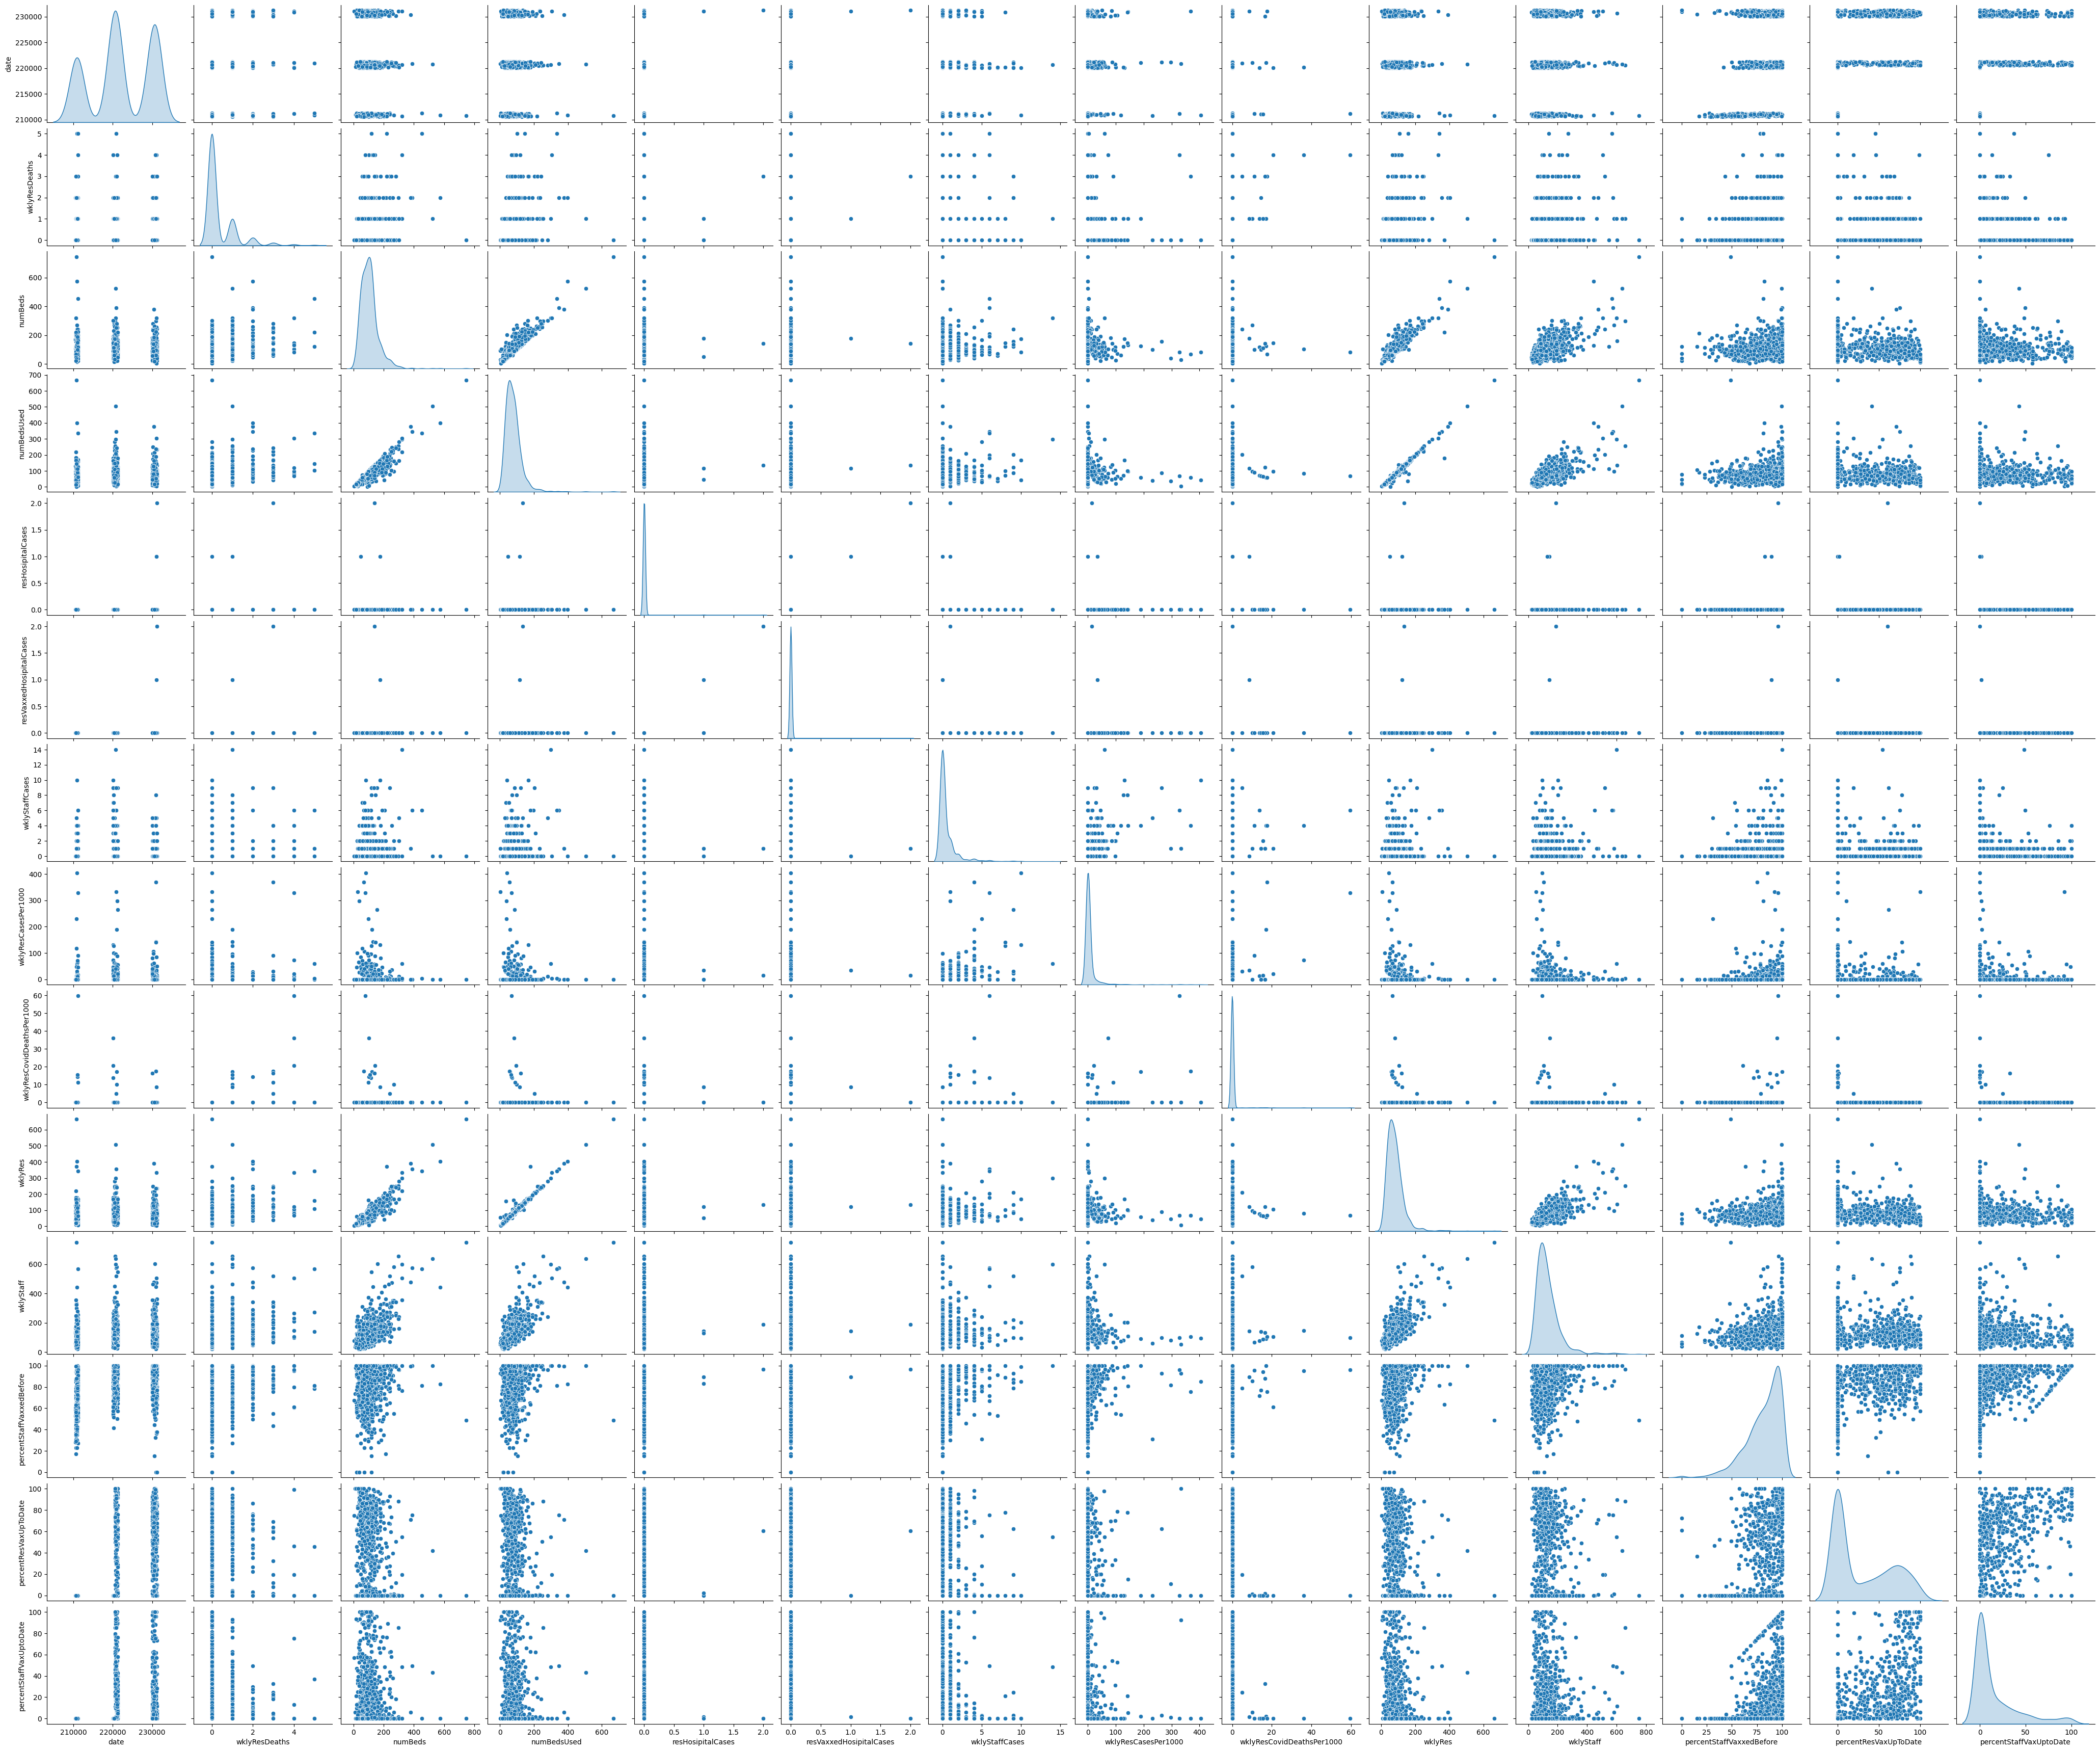

In [18]:
random_sample = df.sample(n=1000, random_state=42)
sns.pairplot(random_sample, diag_kind='kde', height=2.5, aspect=1.2)

In [19]:
corr = df.corr()
corr

,date,wklyResDeaths,numBeds,numBedsUsed,resHosipitalCases,resVaxxedHosipitalCases,wklyStaffCases,wklyResCasesPer1000,wklyResCovidDeathsPer1000,wklyRes,wklyStaff,percentStaffVaxxedBefore,percentResVaxUpToDate,percentStaffVaxUptoDate
date,1.000000,-0.013206,-0.000270,0.042571,0.049756,0.043862,0.001343,0.040711,-0.027491,0.039201,0.078653,0.318486,0.534505,0.269677
wklyResDeaths,-0.013206,1.000000,0.212261,0.217332,0.016870,0.016127,0.106665,0.048248,0.186342,0.232346,0.235019,0.028422,-0.012398,-0.042479
numBeds,-0.000270,0.212261,1.000000,0.877972,0.015164,0.013754,0.119610,-0.010419,-0.011768,0.878771,0.640487,0.085506,-0.023819,0.002879
numBedsUsed,0.042571,0.217332,0.877972,1.000000,0.019185,0.017158,0.116706,-0.012911,-0.018195,0.942446,0.680336,0.130096,0.006890,0.024801
resHosipitalCases,0.049756,0.016870,0.015164,0.019185,1.000000,0.356499,0.057723,0.090158,0.023275,0.020071,0.019333,0.007899,0.007760,-0.004018
resVaxxedHosipitalCases,0.043862,0.016127,0.013754,0.017158,0.356499,1.000000,0.054119,0.084683,0.027797,0.017152,0.019065,0.011423,0.029457,0.012048
wklyStaffCases,0.001343,0.106665,0.119610,0.116706,0.057723,0.054119,1.000000,0.457839,0.091747,0.121972,0.151020,0.043092,-0.023807,-0.010040
wklyResCasesPer1000,0.040711,0.048248,-0.010419,-0.012911,0.090158,0.084683,0.457839,1.000000,0.139936,-0.008237,-0.001688,0.022432,0.001369,0.003976
wklyResCovidDeathsPer1000,-0.027491,0.186342,-0.011768,-0.018195,0.023275,0.027797,0.091747,0.139936,1.000000,-0.015819,-0.004075,-0.014203,-0.025195,-0.019661
wklyRes,0.039201,0.232346,0.878771,0.942446,0.020071,0.017152,0.121972,-0.008237,-0.015819,1.000000,0.711070,0.133801,-0.000394,0.018848


<Axes: >

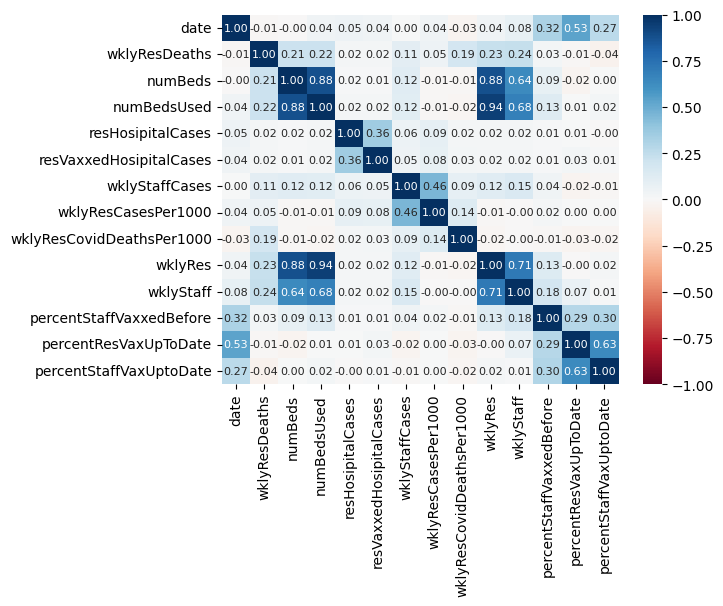

In [20]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True,fmt='0.2f',annot_kws={"size": 8}, cmap= 'RdBu')

#Preprocessing

In [21]:
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(covid_data),columns=covid_data.columns)
# y = pd.DataFrame(scaler.fit_transform(covid_target),columns=covid_target.columns)